<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/0321_1430_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.0 MB/s eta 0:00:00


In [3]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS

Downloading...
From: https://drive.google.com/uc?id=1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS
To: /content/crime_data_2023demo.csv
100% 3.84M/3.84M [00:00<00:00, 135MB/s]


In [4]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])
)
df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'Unnamed: 18', 'dc_key', 'dc_dist', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

<ipython-input-4-622d30c8d99b>:2: DtypeWarning: Columns (0,2,5,6,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])


dispatch_date_time dispatch_date dispatch_time  hour  \
0       2023-01-01 01:29:00+00    2022-12-31      20:29:00  20.0   
1       2023-01-01 01:33:00+00    2022-12-31      20:33:00  20.0   
2       2023-01-01 00:31:00+00    2022-12-31      19:31:00  19.0   
3       2023-01-01 01:43:00+00    2022-12-31      20:43:00  20.0   
4       2023-01-01 02:07:00+00    2022-12-31      21:07:00  21.0   
...                        ...           ...           ...   ...   
169012                     NaN           NaT           NaN   NaN   
169013                     NaN           NaT           NaN   NaN   
169014                     NaN           NaT           NaN   NaN   
169015                     NaN           NaT           NaN   NaN   
169016                     NaN           NaT           NaN   NaN   

                     location_block Category          X          Y  
0                900 BLOCK SOUTH ST   Thefts -75.158541  39.943220  
1             4000 BLOCK COTTMAN AV   Thefts -75.040025  40.036089  
2              7400 BLOCK OXFORD AV   Thefts -75.083517  40.063766  
3       4600 BLOCK E ROOSEVELT BLVD   Thefts -75.102382  40.032128  
4        2700 BLOCK KENSINGTON AV 2   Thefts -75.123884  39.989917  
...                             ...      ...        ...        ...  
169012                          NaN      NaN        NaN        NaN  
169013                          NaN      NaN        NaN        NaN  
169014                          NaN      NaN        NaN        NaN  
169015                          NaN      NaN        NaN        NaN  
169016                          NaN      NaN        NaN        NaN  

[169017 rows x 8 columns]

In [5]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

dispatch_date_time dispatch_date dispatch_time  hour  \
0     2023-01-01 01:29:00+00    2022-12-31      20:29:00  20.0   
1     2023-01-01 01:33:00+00    2022-12-31      20:33:00  20.0   
2     2023-01-01 00:31:00+00    2022-12-31      19:31:00  19.0   
3     2023-01-01 01:43:00+00    2022-12-31      20:43:00  20.0   
4     2023-01-01 02:07:00+00    2022-12-31      21:07:00  21.0   
...                      ...           ...           ...   ...   
1828  2023-01-04 13:16:00+00    2023-01-04       8:16:00   8.0   
1829  2023-01-04 17:05:00+00    2023-01-04      12:05:00  12.0   
1830  2023-01-04 05:00:00+00    2023-01-04       0:00:00   1.0   
1831  2023-01-04 05:00:00+00    2023-01-04       0:00:00  22.0   
1832                     NaN           NaT           NaN   NaN   

                   location_block             Category          X          Y  
0              900 BLOCK SOUTH ST               Thefts -75.158541  39.943220  
1           4000 BLOCK COTTMAN AV               Thefts -75.040025  40.036089  
2            7400 BLOCK OXFORD AV               Thefts -75.083517  40.063766  
3     4600 BLOCK E ROOSEVELT BLVD               Thefts -75.102382  40.032128  
4      2700 BLOCK KENSINGTON AV 2               Thefts -75.123884  39.989917  
...                           ...                  ...        ...        ...  
1828         6600 BLOCK DITMAN ST  Motor Vehicle Theft -75.049308  40.024360  
1829       400 BLOCK E ONTARIO ST  Motor Vehicle Theft -75.120611  40.000605  
1830        4700 BLOCK N BROAD ST  Homicide - Criminal -75.147935  40.024782  
1831          1600 BLOCK  DYRE ST  Homicide - Criminal -75.078720  40.020984  
1832                          NaN                  NaN        NaN        NaN  

[1821 rows x 8 columns]

In [6]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))
train

Training set size: 1456
Testing set size: 365


dispatch_date_time dispatch_date dispatch_time  hour  \
1465  2023-01-04 15:17:00+00    2023-01-04      10:17:00  10.0   
1562  2023-01-05 01:58:00+00    2023-01-04      20:58:00  20.0   
304   2023-01-02 02:05:00+00    2023-01-01      21:05:00  21.0   
1720  2023-01-04 13:58:00+00    2023-01-04       8:58:00   8.0   
617   2023-01-02 17:02:00+00    2023-01-02      12:02:00  12.0   
...                      ...           ...           ...   ...   
1137  2023-01-03 21:24:00+00    2023-01-03      16:24:00  16.0   
1302  2023-01-03 18:25:00+00    2023-01-03      13:25:00  13.0   
867   2023-01-03 18:40:00+00    2023-01-03      13:40:00  13.0   
1469  2023-01-04 23:37:00+00    2023-01-04      18:37:00  18.0   
1133  2023-01-03 22:29:00+00    2023-01-03      17:29:00  17.0   

                  location_block                   Category          X  \
1465      7600 BLOCK WILLIAMS AV                     Thefts -75.161187   
1562      1600 BLOCK HARRISON ST             Other Assaults -75.081502   
304         2500 BLOCK S 10TH ST                      Fraud -75.164234   
1720        2600 BLOCK MASSEY ST  Receiving Stolen Property -75.232695   
617          1000 BLOCK N 2ND ST                      Fraud -75.140235   
...                          ...                        ...        ...   
1137        6500 BLOCK GREENE ST             Other Assaults -75.191202   
1302         100 BLOCK LAUREL ST        Motor Vehicle Theft -75.139655   
867     5900 BLOCK WARRINGTON AV       Burglary Residential -75.234117   
1469         200 BLOCK ROBINA ST                     Thefts -75.036646   
1133  5300 BLOCK W MONTGOMERY AV                      Fraud -75.229469   

              Y  
1465  40.069103  
1562  40.019145  
304   39.917273  
1720  39.916229  
617   39.966363  
...         ...  
1137  40.043395  
1302  39.965037  
867   39.935833  
1469  40.116543  
1133  39.984486  

[1456 rows x 8 columns]

In [7]:
train.duplicated().sum()

0

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-8-13c5d8c4436a>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


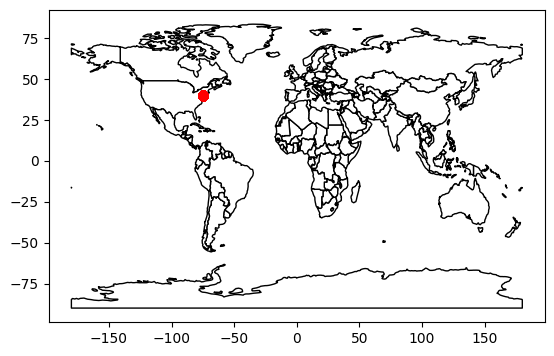

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


<ipython-input-12-3da43c9e537a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=incident_count_per_day, shade=True)


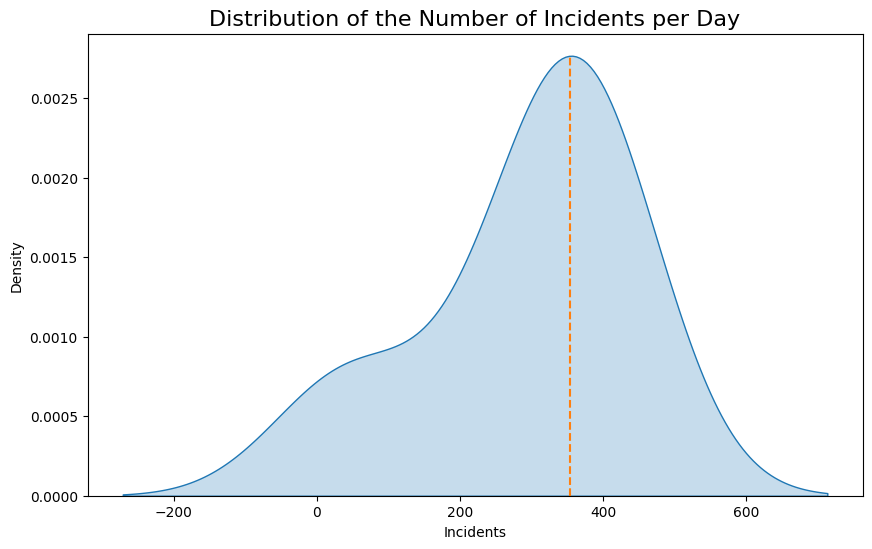

In [12]:
col = sns.color_palette()

# Calculate the date and hour
train['Date'] = train.dispatch_date.dt.date
train['Hour'] = train.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [13]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train['weekday'] = train['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train['weekday'] = train['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train


dispatch_date_time dispatch_date dispatch_time  hour  \
1465  2023-01-04 15:17:00+00    2023-01-04      10:17:00  10.0   
1562  2023-01-05 01:58:00+00    2023-01-04      20:58:00  20.0   
304   2023-01-02 02:05:00+00    2023-01-01      21:05:00  21.0   
1720  2023-01-04 13:58:00+00    2023-01-04       8:58:00   8.0   
617   2023-01-02 17:02:00+00    2023-01-02      12:02:00  12.0   
...                      ...           ...           ...   ...   
1137  2023-01-03 21:24:00+00    2023-01-03      16:24:00  16.0   
1302  2023-01-03 18:25:00+00    2023-01-03      13:25:00  13.0   
867   2023-01-03 18:40:00+00    2023-01-03      13:40:00  13.0   
1469  2023-01-04 23:37:00+00    2023-01-04      18:37:00  18.0   
1133  2023-01-03 22:29:00+00    2023-01-03      17:29:00  17.0   

                  location_block                   Category          X  \
1465      7600 BLOCK WILLIAMS AV                     Thefts -75.161187   
1562      1600 BLOCK HARRISON ST             Other Assaults -75.081502   
304         2500 BLOCK S 10TH ST                      Fraud -75.164234   
1720        2600 BLOCK MASSEY ST  Receiving Stolen Property -75.232695   
617          1000 BLOCK N 2ND ST                      Fraud -75.140235   
...                          ...                        ...        ...   
1137        6500 BLOCK GREENE ST             Other Assaults -75.191202   
1302         100 BLOCK LAUREL ST        Motor Vehicle Theft -75.139655   
867     5900 BLOCK WARRINGTON AV       Burglary Residential -75.234117   
1469         200 BLOCK ROBINA ST                     Thefts -75.036646   
1133  5300 BLOCK W MONTGOMERY AV                      Fraud -75.229469   

              Y        Date  Hour    weekday  
1465  40.069103  2023-01-04   0.0  Wednesday  
1562  40.019145  2023-01-04   0.0  Wednesday  
304   39.917273  2023-01-01   0.0     Sunday  
1720  39.916229  2023-01-04   0.0  Wednesday  
617   39.966363  2023-01-02   0.0     Monday  
...         ...         ...   ...        ...  
1137  40.043395  2023-01-03   0.0    Tuesday  
1302  39.965037  2023-01-03   0.0    Tuesday  
867   39.935833  2023-01-03   0.0    Tuesday  
1469  40.116543  2023-01-04   0.0  Wednesday  
1133  39.984486  2023-01-03   0.0    Tuesday  

[1456 rows x 11 columns]

In [ ]:
data = train.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

In [ ]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x=data.index,  # X-axis data (weekdays)
        y=(data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [ ]:
train

In [ ]:
data = train.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

In [ ]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()
